In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('nonvoters_data.csv')

# Here's what our data looks like

df.head()


,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


## Null values 

In this part of the EDA, we'll in inspect our null values. 



<AxesSubplot:>

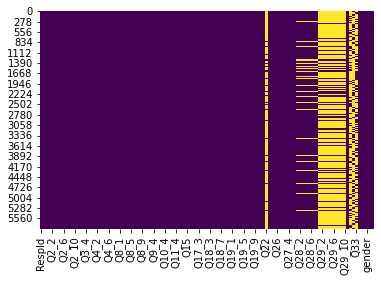

In [4]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')


We can see the majority of our null values happen for specific questions. 

For this reason, we'll exclude those questions from our analysis.

# Drop columns with missing values



In [5]:
df.dropna()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category


# Rename and filter out the columns for our final dataframe

Our analysis will focus on what it means to be a good American and perceptions around racism. 

These subjects correspond with questions two and three. For this reason, I'm going to rename the corresponding columns and then create a new, final dataframe that will also include demographic information. 

In [6]:
df.dtypes

RespId              int64
weight            float64
Q1                  int64
Q2_1                int64
Q2_2                int64
                   ...   
educ               object
race               object
gender             object
income_cat         object
voter_category     object
Length: 119, dtype: object

In [7]:
df = df.rename(columns={"Q2_1":"Voting",
        "Q2_7":"Military Support",
        "Q2_9":"Believing in God",
        "Q2_10":"Protesting", "Q3_1": "Racism_US","Q3_2": "Racism_Policing"})

df = df.copy().loc[:,["Voting","Military Support","Believing in God","Protesting","Racism_US","Racism_Policing","weight","ppage","educ","race","gender","income_cat","voter_category"]]


## Heatmaps

Now, we'll create a series of heatmaps to investigate the trends

<AxesSubplot:>

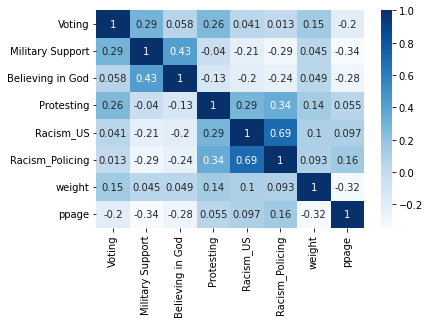

In [8]:
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [9]:
df.head()

,Voting,Military Support,Believing in God,Protesting,Racism_US,Racism_Policing,weight,ppage,educ,race,gender,income_cat,voter_category
0,1,2,4,2,1,1,0.7516,73,College,White,Female,$75-125k,always
1,1,2,1,3,3,3,1.0267,90,College,White,Female,$125k or more,always
2,1,2,4,3,2,2,1.0844,53,College,White,Male,$125k or more,sporadic
3,1,1,1,2,1,1,0.6817,58,Some college,Black,Female,$40-75k,sporadic
4,1,1,1,1,4,-1,0.9910,81,High school or less,White,Male,$40-75k,always


## Binning our data

We'll want to make sure our demographic data is strucutured for visualization and analysis.

In [10]:
def get_column_values(dataframe, column_list):
    """Get values for columns"""
    for i in column_list:
        print ("There are",len((dataframe[i].unique().tolist())), "values for", i+":")
        print (dataframe[i].unique().tolist())
        print ("\n")

    
get_column_values(df, ["ppage","educ","race","gender","income_cat"])

There are 72 values for ppage:
[73, 90, 53, 58, 81, 61, 80, 68, 70, 83, 43, 42, 48, 52, 76, 63, 46, 62, 84, 71, 50, 77, 67, 54, 47, 87, 55, 64, 82, 66, 75, 59, 44, 36, 56, 57, 29, 38, 26, 27, 28, 49, 72, 39, 40, 74, 65, 89, 69, 79, 30, 41, 78, 60, 25, 22, 88, 31, 35, 85, 32, 51, 45, 86, 37, 92, 33, 24, 34, 23, 94, 91]


There are 3 values for educ:
['College', 'Some college', 'High school or less']


There are 4 values for race:
['White', 'Black', 'Other/Mixed', 'Hispanic']


There are 2 values for gender:
['Female', 'Male']


There are 4 values for income_cat:
['$75-125k', '$125k or more', '$40-75k', 'Less than $40k']




We can see that, aside from age, the other columns don't have too many values. 

For that reason, we're going to create bins for age- to make our analysis easier.

In [11]:
label_values = ["22-26","27-31","32-36","37-41","42-46","47-51","52-56","57-61","62-66","67-71","72-76","77-81","82-86","87-91","92-94"]
bins = [21,26,31,36,41,46,51,56,61,66,71,76,81,86,91,94]

def create_bins(dataframe, column, new_column_name, label_values, bins):
    """Function to create bins for our data"""
    dataframe[new_column_name] = pd.cut(dataframe[column], bins, labels = label_values)

create_bins(df, "ppage", "Age", label_values, bins)

df

,Voting,Military Support,Believing in God,Protesting,Racism_US,Racism_Policing,weight,ppage,educ,race,gender,income_cat,voter_category,Age
0,1,2,4,2,1,1,0.7516,73,College,White,Female,$75-125k,always,72-76
1,1,2,1,3,3,3,1.0267,90,College,White,Female,$125k or more,always,87-91
2,1,2,4,3,2,2,1.0844,53,College,White,Male,$125k or more,sporadic,52-56
3,1,1,1,2,1,1,0.6817,58,Some college,Black,Female,$40-75k,sporadic,57-61
4,1,1,1,1,4,-1,0.9910,81,High school or less,White,Male,$40-75k,always,77-81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,1,2,3,1,1,1,1.1916,27,Some college,Hispanic,Male,$40-75k,always,27-31
5832,1,1,1,1,1,1,1.4623,59,High school or less,White,Female,$125k or more,rarely/never,57-61
5833,1,2,4,1,1,3,0.9252,51,College,Other/Mixed,Male,$125k or more,sporadic,47-51
5834,2,2,2,2,4,3,2.6311,22,High school or less,Black,Female,Less than $40k,always,22-26


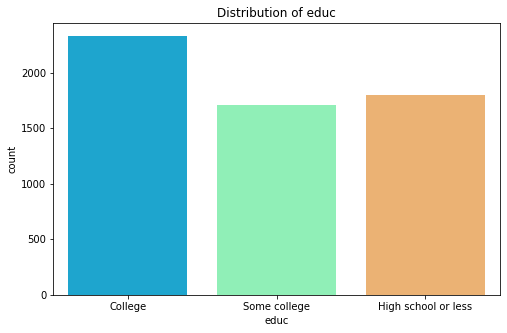

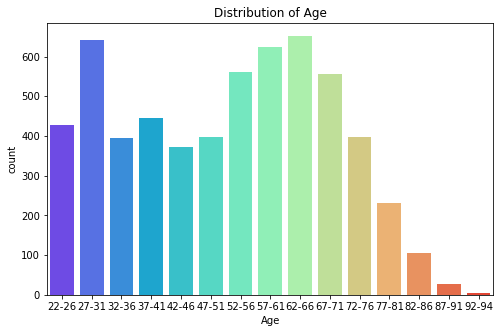

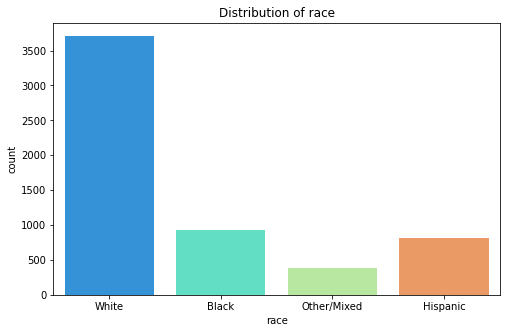

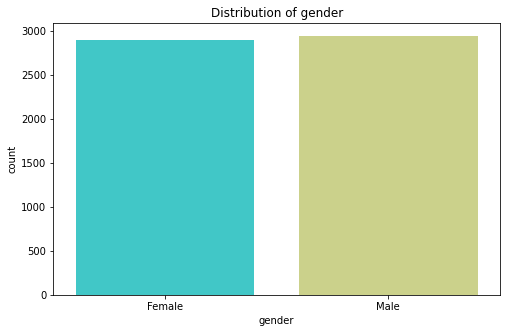

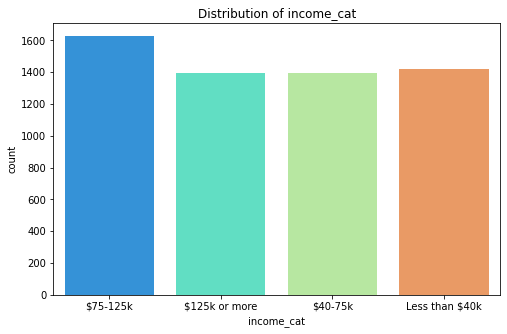

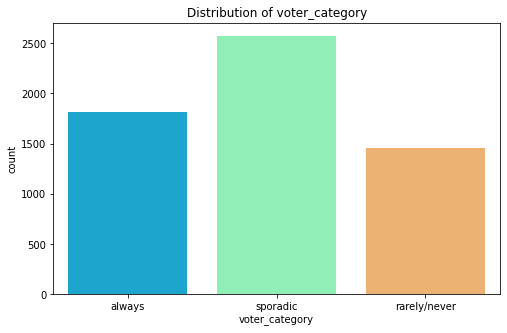

In [13]:
x_values = ["educ","Age","race","gender", "income_cat","voter_category"]
dataframe = df 
def create_countplot(x_values, dataframe):
    """Creates distribution plot for categorical variables"""
    for variable in x_values:
        plt.figure(figsize=(8,5))
        plot_title = ("Distribution of "+variable)
        plt.title(plot_title)
        sns.countplot(x=variable,data = dataframe, palette='rainbow')

        

create_countplot(x_values, dataframe)